In [1]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline
np.seterr(under = 'ignore')

Imported pathlib::Path, os, munch::Munch, pickle, logging, itertools::count, matplotlib::colors
Names are pyplot = plt, matplotlib = mpl, numpy = np


{'divide': 'warn', 'over': 'warn', 'under': 'warn', 'invalid': 'warn'}

contraint that sqrt be real gives 0.3359 <= A
contraint from mean gives A <= sum |F| <= 1
A = 0.67
sum |F| = 1.083
sum F**2 = 0.6679
(100,)
-1.0768023763968808 <  P < 1.0816095823986012
-0.038401188198440406 <  P < 1.0408047911993006
0.5965


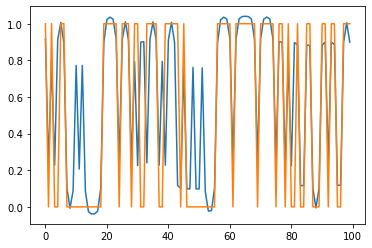

In [193]:
from numpy.fft import rfft, irfft, rfftfreq, hfft, ihfft
import scipy.signal

from numpy.random import default_rng
rng = default_rng()

def filter_function(correlation_function, mean):
    N = len(correlation_function)*2 - 1
    Sq = hfft(correlation_function)
    
    minA = max(1 - Sq)
    maxA = min(mean, 1-mean)/np.sqrt(mean*(1-mean))
    A = 1/2 * (minA + maxA)
    
    x = np.sqrt(Sq - 1 + A)
    
    print(f"contraint that sqrt be real gives {minA:.4g} <= A")
    print(f"contraint from mean gives A <= sum |F| <= {maxA:.4g}")
    print(f"A = {A:.2g}")
    
    assert(minA < maxA)
    
    F = ihfft(x).real
    F = np.concatenate([np.flip(F),F])
    
    print(f"sum |F| = {np.sum(np.abs(F)):.2g}")
    print(f"sum F**2 = {np.sum(F**2):.2g}")
    
    return F
    
    

def correlated_noise(normalised_correlation_function, L, R, mean):
    N = len(normalised_correlation_function)
    assert(normalised_correlation_function[0] == 1)
    
    #calculate the filter function F
    Sq = hfft(normalised_correlation_function, 2*N - 1)
    
    minA = max(1 - Sq)
    maxA = min(mean, 1-mean)/np.sqrt(mean*(1-mean))
    A = 1/2 * (minA + maxA)
    
    x = np.sqrt(Sq - 1 + A)
    
    print(f"contraint that sqrt be real gives {minA:.4g} <= A")
    print(f"contraint from mean gives A <= sum |F| <= {maxA:.4g}")
    print(f"A = {A:.2g}")
    
    assert(minA < maxA)
    
    F = ihfft(x).real
    F = np.concatenate([np.flip(F[1:]),F])
    
    print(f"sum |F| = {np.sum(np.abs(F)):.4g}")
    print(f"sum F**2 = {np.sum(F**2):.4g}")
    
    #draw random binary numbers U with mean 0 and variance 1 
    U = rng.choice([-1,1], size = (L + 2*(N-1),))
    
    Pd = scipy.signal.convolve(U, F, mode = 'valid')
    print(Pd.shape)
    
    print(f"{min(Pd)} <  P < {max(Pd)}")
    P = mean + np.sqrt(mean * (1 - mean)) * Pd
    
    print(f"{min(P)} <  P < {max(P)}")
    #assert(np.all(0 < P))
    #assert(np.all(P <= 1))

    
    #draw uniform numbers in the interval 0,1
    V = rng.random(size = (R, P.shape[-1]))
    
    correlated_noise = V < P[np.newaxis, :]
    
    return Sq, F, P, correlated_noise

r = np.arange(0, 50)
correlation_function = np.exp(-r * 1.6)
Sq, F, P, c  = correlated_noise(correlation_function, L = 100, R = 100, mean = 0.5)
print(c.mean())
plt.plot(P)
plt.plot(c[0, :])

In [116]:
r = np.arange(0, 50)
correlation_function = np.exp(-r * 1.6)
Sq, F, P, c  = correlated_noise(correlation_function, L = 100, R = 100, mean = 0.4)
print(c.mean())
plt.plot(P)
plt.plot(c[0, :])

0.625

contraint that sqrt be real gives 0.1645 <= A
contraint from mean gives A <= sum |F| <= 1
A = 0.58
sum |F| = 0.9545
sum F**2 = 0.5822
(100,)
-0.8988013906250564 <  P < 0.9182595043991031
0.05059930468747181 <  P < 0.9591297521995515
0.512


/Users/tom/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


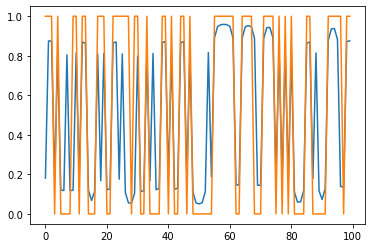

In [202]:
r = np.arange(0, 1000)
a = 0.1
K = a / r**2
K[0] = 1

Sq, F, P, c  = correlated_noise(K, L = 100, R = 10, mean = 0.5)
print(c.mean())
plt.plot(P)
plt.plot(c[0, :])

In [73]:
c = correlated_noise(correlation_function, 100, mean = 0.5)
plt.plot(c[1, ])

contraint that sqrt be real gives 0.95 <= A
contraint from mean gives A <= sum |F| <= 1
(100, 100)


ValueError: volume and kernel should have the same dimensionality